In [1]:
import torch
import stim
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])
from decoders import Nbp
from decoders.tensor_tools import DEM_Matrices, DEM_to_matrices
from decoders.train_tools import optimization_step, training_loop

In [2]:
def plot(loss):
    plt.figure(figsize=(5, 5))
    plt.plot(loss)
    plt.xlabel(r'Minibatch')
    plt.ylabel(r'$\mathcal{L}$')
    plt.show()

def plot_residuals(decoder):
    plt.figure(figsize=(5, 5))
    plt.plot(decoder.residual_weights[0].detach().numpy(), marker='o')
    plt.xlabel(r'i (Layers)')
    plt.ylabel(r'$r_i$')
    plt.show()
    
def plot_rhos(decoder):
    plt.figure(figsize=(5, 5))
    plt.plot(decoder.rhos[0].detach().numpy(), marker='o')
    plt.xlabel(r'i (Layers)')
    plt.ylabel(r'$\rho_i$')
    plt.show()

## Phenomenological Noise (Binary cross entropy)

loss 0.0498585179448128: 100%|██████████| 1000/1000 [01:03<00:00, 15.75it/s]


Weigths saved as weights_de.pt, weights_llr.pt, marg_weights_de.pt, marg_weights_llr.pt, residual_weights.pt, rhos.pt at repetition_weights/phenomenological_binary_cross_entropy.
Training complete.



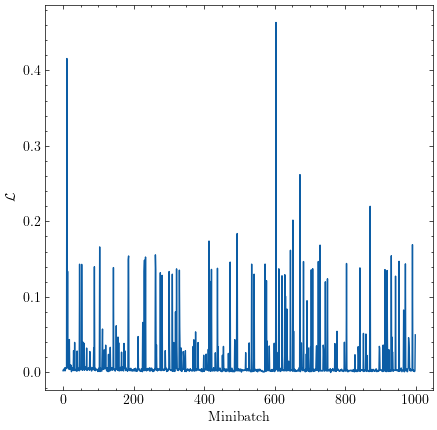

In [3]:
p = 0.005
LEARNING_RATE = 0.001
LAYERS = 20
BATCH_SIZE = 120
MINIBATCHES = 1000
CODE = 'repetition'
NOISE_MODEL = 'phenomenological'
LOSS_FUNCTION = 'binary_cross_entropy'
WEIGHTS_PATH = f'{CODE}_weights/{NOISE_MODEL}_{LOSS_FUNCTION}'

circuit = stim.Circuit.generated(
                "repetition_code:memory",
                rounds=3,
                distance=3,
                after_clifford_depolarization=0.00,
                after_reset_flip_probability=0.00,
                before_measure_flip_probability=p,
                before_round_data_depolarization=p)

decoder = Nbp(circuit=circuit,
              layers=LAYERS,
              batch_size=BATCH_SIZE,
              loss_function=LOSS_FUNCTION)

parameters = decoder.weights_llr + decoder.weights_de + decoder.marg_weights_llr + decoder.marg_weights_de + decoder.rhos + decoder.residual_weights
optimiser = torch.optim.Adam(parameters, lr=LEARNING_RATE)
loss = training_loop(decoder=decoder, 
                     optimizer=optimiser, 
                     mini_batches=MINIBATCHES, 
                     path=WEIGHTS_PATH)

plot(loss)

## Phenomenological Noise (He=s)

  0%|          | 0/1000 [00:00<?, ?it/s]

loss 0.0006469683721662: 100%|██████████| 1000/1000 [01:24<00:00, 11.80it/s]


Weigths saved as weights_de.pt, weights_llr.pt, marg_weights_de.pt, marg_weights_llr.pt, residual_weights.pt, rhos.pt at repetition_weights/phenomenological_He=s.
Training complete.



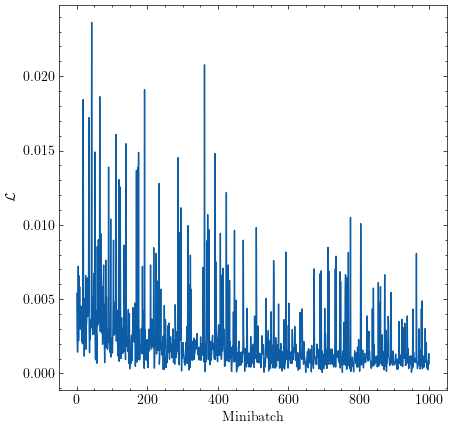

In [4]:
p = 0.005
LEARNING_RATE = 0.001
LAYERS = 20
BATCH_SIZE = 120
MINIBATCHES = 1000
CODE = 'repetition'
NOISE_MODEL = 'phenomenological'
LOSS_FUNCTION = 'He=s'
WEIGHTS_PATH = f'{CODE}_weights/{NOISE_MODEL}_{LOSS_FUNCTION}'

circuit = stim.Circuit.generated(
                "repetition_code:memory",
                rounds=3,
                distance=3,
                after_clifford_depolarization=0.00,
                after_reset_flip_probability=0.00,
                before_measure_flip_probability=p,
                before_round_data_depolarization=p)

decoder = Nbp(circuit=circuit,
              layers=LAYERS,
              batch_size=BATCH_SIZE,
              loss_function=LOSS_FUNCTION)

parameters = decoder.weights_llr + decoder.weights_de + decoder.marg_weights_llr + decoder.marg_weights_de + decoder.rhos + decoder.residual_weights
optimiser = torch.optim.Adam(parameters, lr=LEARNING_RATE)
loss = training_loop(decoder=decoder, 
                     optimizer=optimiser, 
                     mini_batches=MINIBATCHES, 
                     path=WEIGHTS_PATH)

plot(loss)

## Circuit level noise (Binary cross entropy)

loss 0.0214265510439873: 100%|██████████| 1000/1000 [01:39<00:00, 10.08it/s]


Weigths saved as weights_de.pt, weights_llr.pt, marg_weights_de.pt, marg_weights_llr.pt, residual_weights.pt, rhos.pt at repetition_weights/circuit_binary_cross_entropy.
Training complete.



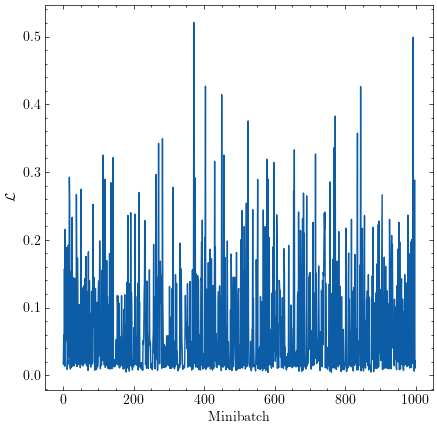

In [5]:
p = 0.005
LEARNING_RATE = 0.001
LAYERS = 20
BATCH_SIZE = 120
MINIBATCHES = 1000
CODE = 'repetition'
NOISE_MODEL = 'circuit'
LOSS_FUNCTION = 'binary_cross_entropy'
WEIGHTS_PATH = f'{CODE}_weights/{NOISE_MODEL}_{LOSS_FUNCTION}'

circuit = stim.Circuit.generated(
                "repetition_code:memory",
                rounds=3,
                distance=3,
                after_clifford_depolarization=p,
                after_reset_flip_probability=p,
                before_measure_flip_probability=p,
                before_round_data_depolarization=p)

decoder = Nbp(circuit=circuit,
              layers=LAYERS,
              batch_size=BATCH_SIZE,
              loss_function=LOSS_FUNCTION)

parameters = decoder.weights_llr + decoder.weights_de + decoder.marg_weights_llr + decoder.marg_weights_de + decoder.rhos + decoder.residual_weights
optimiser = torch.optim.Adam(parameters, lr=LEARNING_RATE)
loss = training_loop(decoder=decoder, 
                     optimizer=optimiser, 
                     mini_batches=MINIBATCHES, 
                     path=WEIGHTS_PATH)

plot(loss)

## Circuit level noise (He=s)

loss 0.0027925267349929: 100%|██████████| 1000/1000 [01:53<00:00,  8.79it/s]


Weigths saved as weights_de.pt, weights_llr.pt, marg_weights_de.pt, marg_weights_llr.pt, residual_weights.pt, rhos.pt at repetition_weights/circuit_He=s.
Training complete.



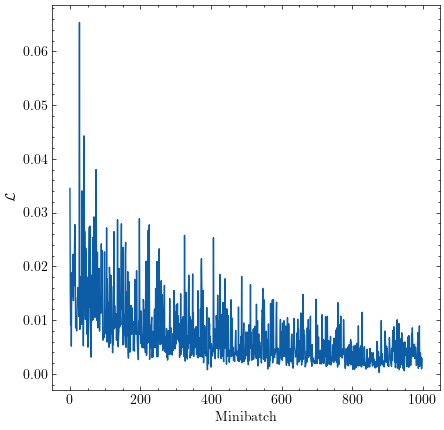

In [6]:
p = 0.005
LEARNING_RATE = 0.001
LAYERS = 20
BATCH_SIZE = 120
MINIBATCHES = 1000
CODE = 'repetition'
NOISE_MODEL = 'circuit'
LOSS_FUNCTION = 'He=s'
WEIGHTS_PATH = f'{CODE}_weights/{NOISE_MODEL}_{LOSS_FUNCTION}'

circuit = stim.Circuit.generated(
                "repetition_code:memory",
                rounds=3,
                distance=3,
                after_clifford_depolarization=p,
                after_reset_flip_probability=p,
                before_measure_flip_probability=p,
                before_round_data_depolarization=p)

decoder = Nbp(circuit=circuit,
              layers=LAYERS,
              batch_size=BATCH_SIZE,
              loss_function=LOSS_FUNCTION)

parameters = decoder.weights_llr + decoder.weights_de + decoder.marg_weights_llr + decoder.marg_weights_de + decoder.rhos + decoder.residual_weights
optimiser = torch.optim.Adam(parameters, lr=LEARNING_RATE)
loss = training_loop(decoder=decoder, 
                     optimizer=optimiser, 
                     mini_batches=MINIBATCHES, 
                     path=WEIGHTS_PATH)

plot(loss)